In [1]:
import numpy as np
import scipy
from scipy.misc import derivative
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [17]:
EPS = 1e-4

START_X = -2
START_Y = 2
COUNTER = 0

In [18]:
def f(vx):
    x = vx[0]
    y = vx[1]
    global COUNTER
    COUNTER += 1
    return 2*x**4 + 5*x**6 + 16*(x**3)*y + 4*y**2 - 8*(x**2)*(y**3) + 2*y**6

def df(x0):
    dx = scipy.misc.derivative(lambda x: f(np.array([x, x0[1]])), x0[0], EPS)
    dy = scipy.misc.derivative(lambda y: f(np.array([x0[0], y])), x0[1], EPS)

    return np.array([dx, dy])

def golden_ratio(f, l = -100, r = 100, eps = EPS):
    # Значения функции в промежуточных точках неизвестны
    f1 = None
    f2 = None
    
    while (np.abs(r - l) / 2 > eps):
        m1 = l + (3 - np.sqrt(5)) / 2 * (r - l)
        m2 = l + (np.sqrt(5) - 1) / 2 * (r - l)
        
        # Вычисляем f если нет значения с предыдущего шага
        if f1 is None:
            f1 = f(m1)
            
        # Вычисляем f если нет значения с предыдущего шага
        if f2 is None:
            f2 = f(m2)
            
        if f1 <= f2:
            r = m2
            f2 = f1
            f1 = None
        else:
            l = m1
            f1 = f2
            f2 = None
    
    return (l + r) / 2

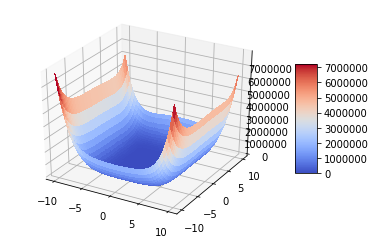

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Метод покоординатного спуска

In [20]:
def coordinates_method(f, eps=EPS):
    c = np.array([START_X, START_Y])

    f_previous = None
    iters = 0
    while (True):
        c_x = golden_ratio(lambda x: f([x, c[1]]), eps=1e-2)
        c_y = golden_ratio(lambda y: f([c[0], y]), eps=1e-2)
        c = np.array([c_x, c_y])
        
        c_f = f(c)
        
        if ((f_previous is not None) and (np.abs(c_f - f_previous) < eps)):
            return c, c_f
        
        f_previous = c_f

In [21]:
COUNTER = 0
c, c_f = coordinates_method(f)
print("Метод покоординатного спуска.\nМинимум {} при x = {}, y = {}.\nКоличество вычислений функции: {}".format(c_f, c[0], c[1], COUNTER))

Метод покоординатного спуска.
Минимум -62.269870449552556 при x = -1.6978769210759084, y = 1.9300750565356637.
Количество вычислений функции: 473


# Метод наискорейшего градиентного спуска

In [22]:
def get_alpha(f, x, df):
    f_alpha = lambda alpha: f(x - alpha * df)
    alpha_optim = golden_ratio(f_alpha, l = 0, r = 1, eps=1e-4)
    return alpha_optim

In [23]:
def gradient_method(f, eps=EPS):
    c = np.array([START_X, START_Y])
    
    f_previous = None
    
    cur_step = 0
    while (True):      
        grad = df(c)
        alpha = get_alpha(f, c, grad)
        
        c = c - alpha * grad
        f_c = f(c)
        
        if ((f_previous is not None) and (np.abs(f_c - f_previous) < eps)):
            return c, f_c

        f_previous = f_c

In [24]:
COUNTER = 0
COUNTER2 = 0
c, c_f = gradient_method(f)
print("Наискорейший градиентный спуск.\nМинимум {} при x = {}, y = {}.\nКоличество вычислений функции: {}".format(c_f, c[0], c[1], COUNTER))

Наискорейший градиентный спуск.
Минимум -62.2708424704074 при x = -1.6967674071094663, y = 1.9279688658971845.
Количество вычислений функции: 130
